In [1]:
import matplotlib
import matplotlib.pyplot as plt
import torch
%matplotlib inline
import tqdm
import numpy as np
from JulienNet import JulienNet

import torchvision
import random

In [2]:
dropout = False


In [3]:
from JulienNet import SetGenerator
CIFAR_10_Generator = SetGenerator(100,100)

Files already downloaded and verified
Files already downloaded and verified


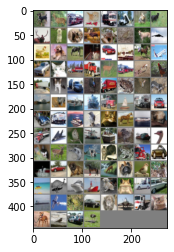

In [4]:
plt.imshow(CIFAR_10_Generator.show_random())

cuda:0


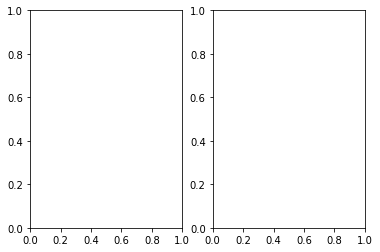

In [5]:
from JulienNet import JNetTrainer
Trainer = JNetTrainer(CIFAR_10_Generator,200,dropout,'JNet_No_dropout.pth')
# Trainer.train()
Trainer.load('Jnet.pth')

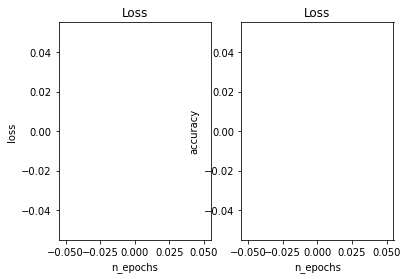

In [6]:
fig,ax=plt.subplots(1,2)
ax[0].plot(Trainer.train_loss_list,color='k')
ax[0].plot(Trainer.val_loss_list,color='g')

ax[0].set(title="Loss",xlabel="n_epochs",ylabel="loss")


ax[1].plot(Trainer.train_accuracy_list,color='b')
ax[1].plot(Trainer.val_accuracy_list,color='r')
ax[1].set(title="Loss",xlabel="n_epochs",ylabel="accuracy")
plt.show()

In [7]:
# np.save('training models/Nodropout/training_accuracy',Trainer.train_accuracy_list)
# np.save('training models/Nodropout/val_accuracy',Trainer.val_accuracy_list)
# np.save('training models/Nodropout/training_loss',Trainer.train_loss_list)
# np.save('training models/Nodropout/val_loss',Trainer.val_loss_list)

6
Layer  1
Layer  2
Layer  3
Layer  4
Layer  5
Layer  6


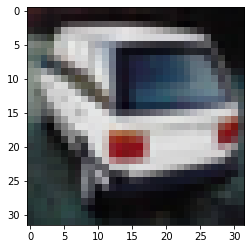

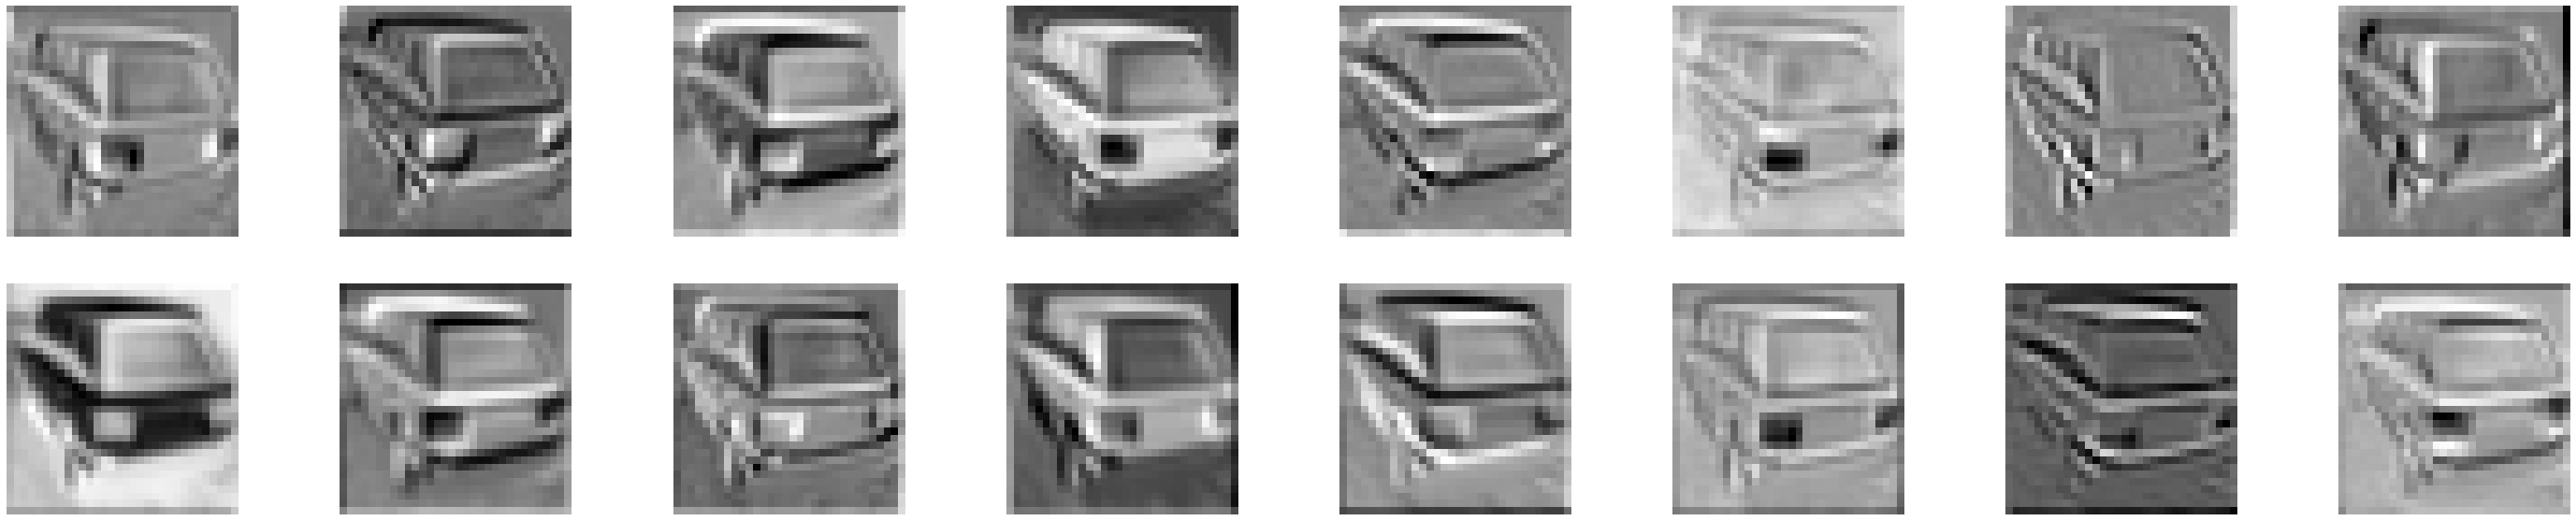

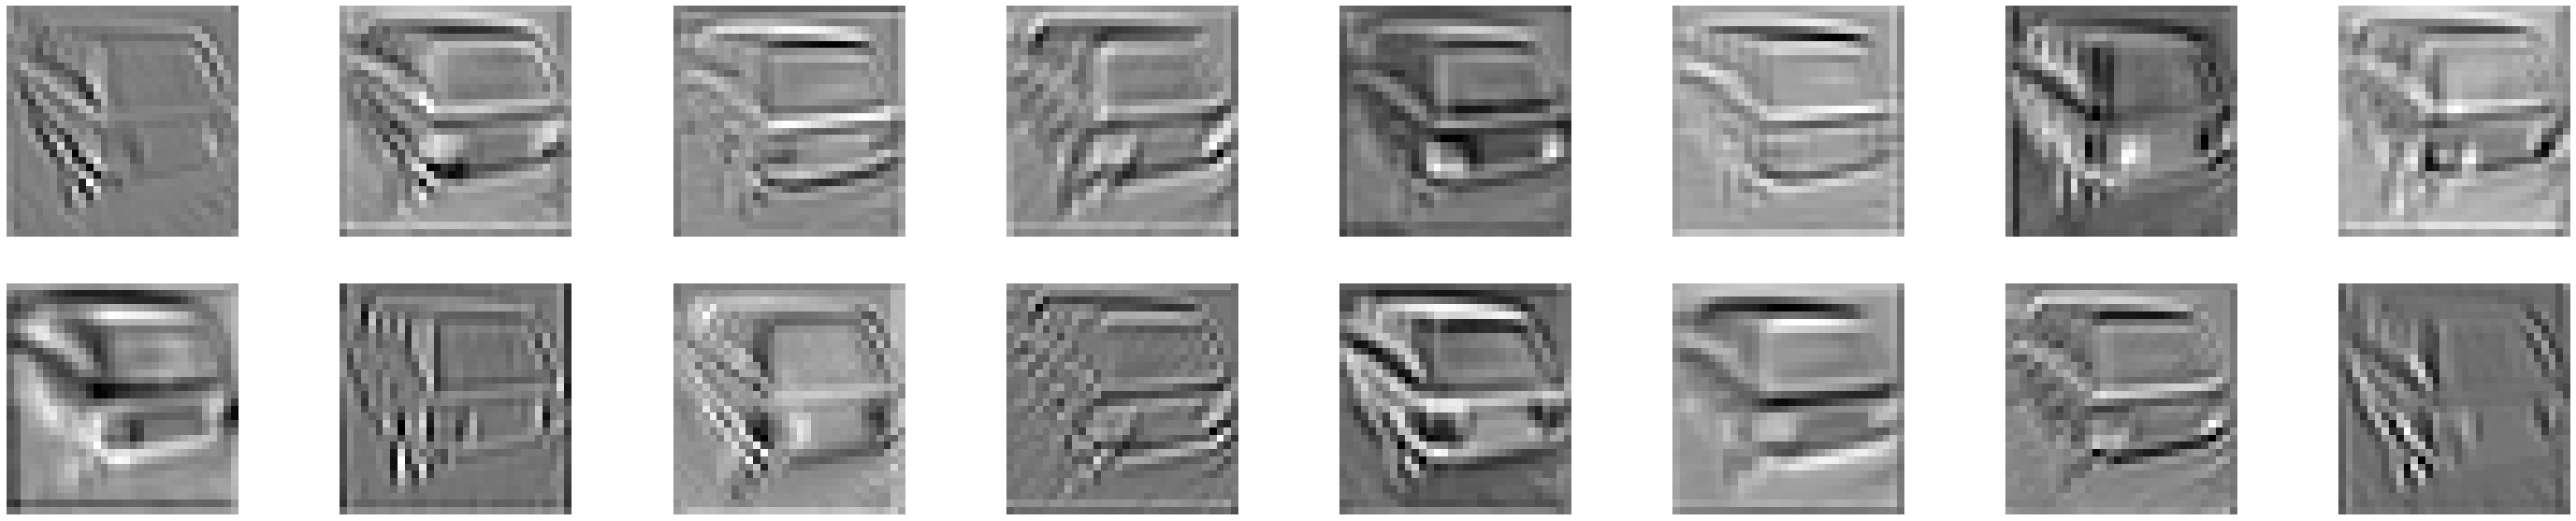

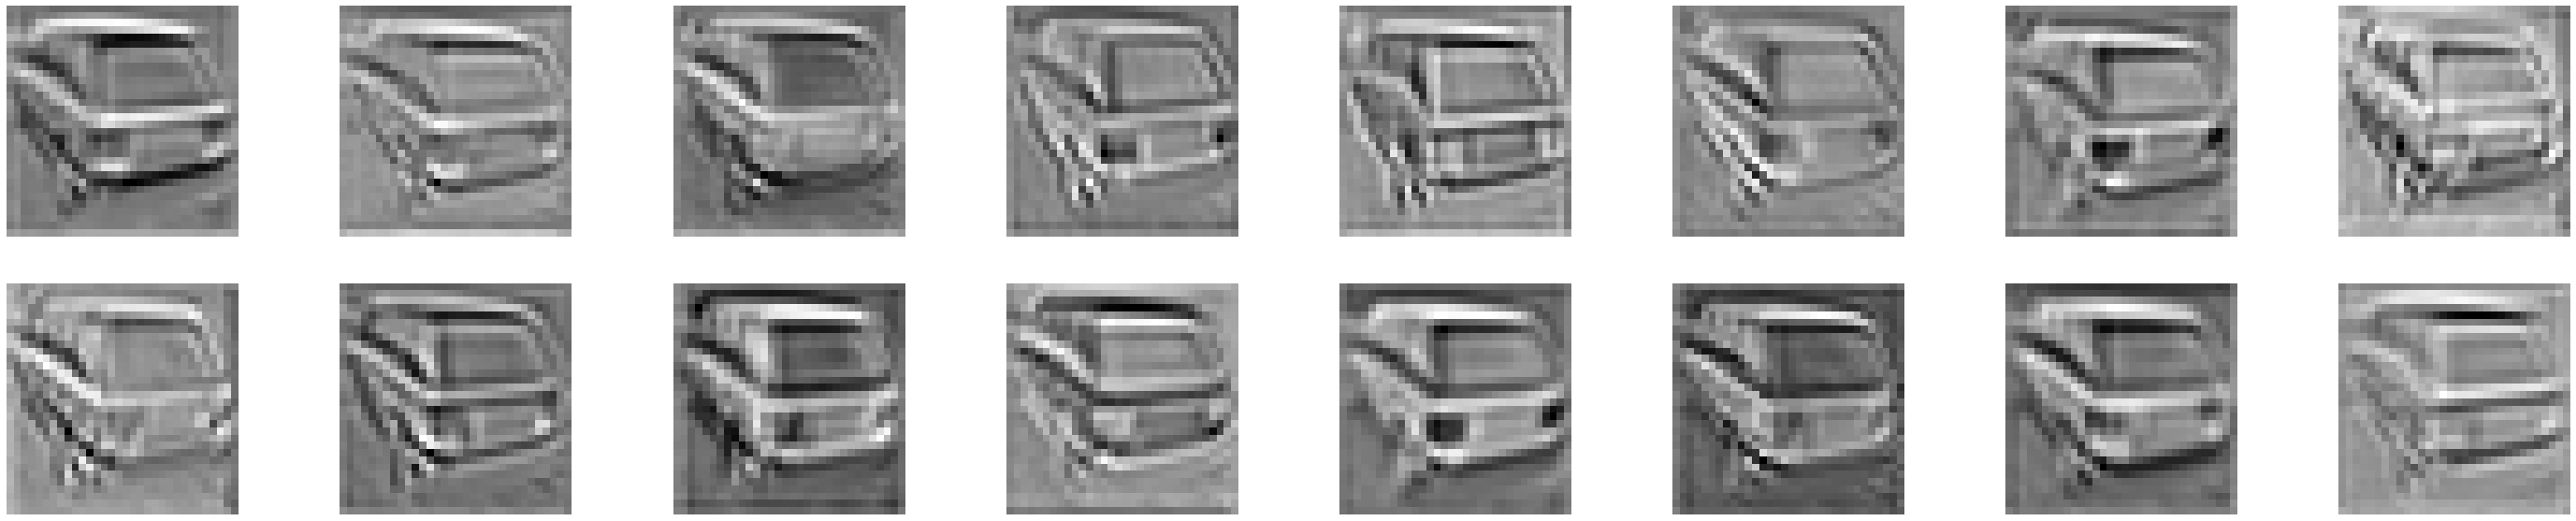

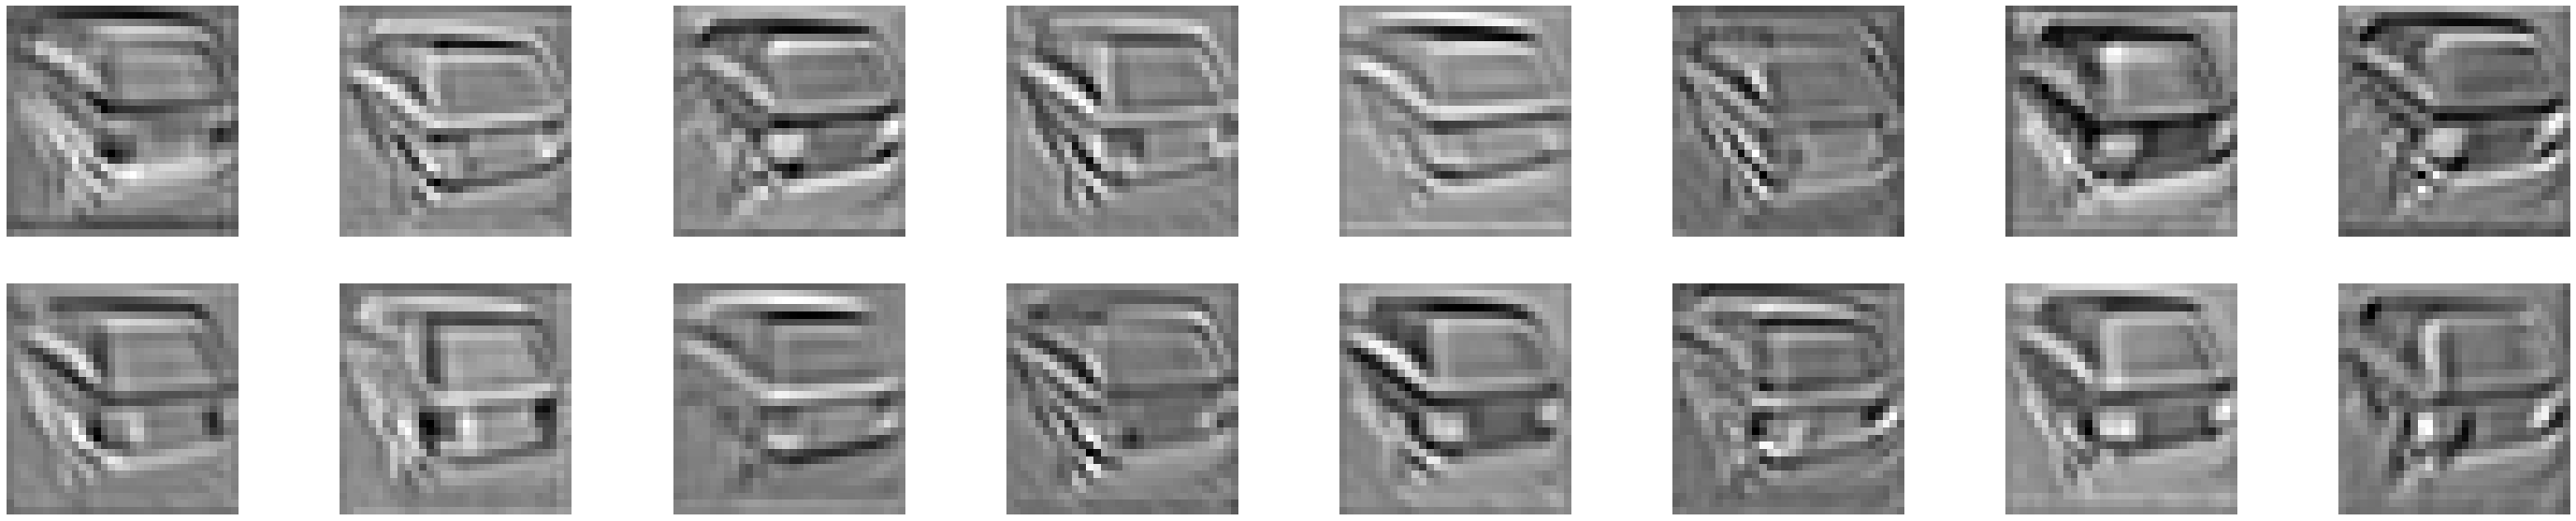

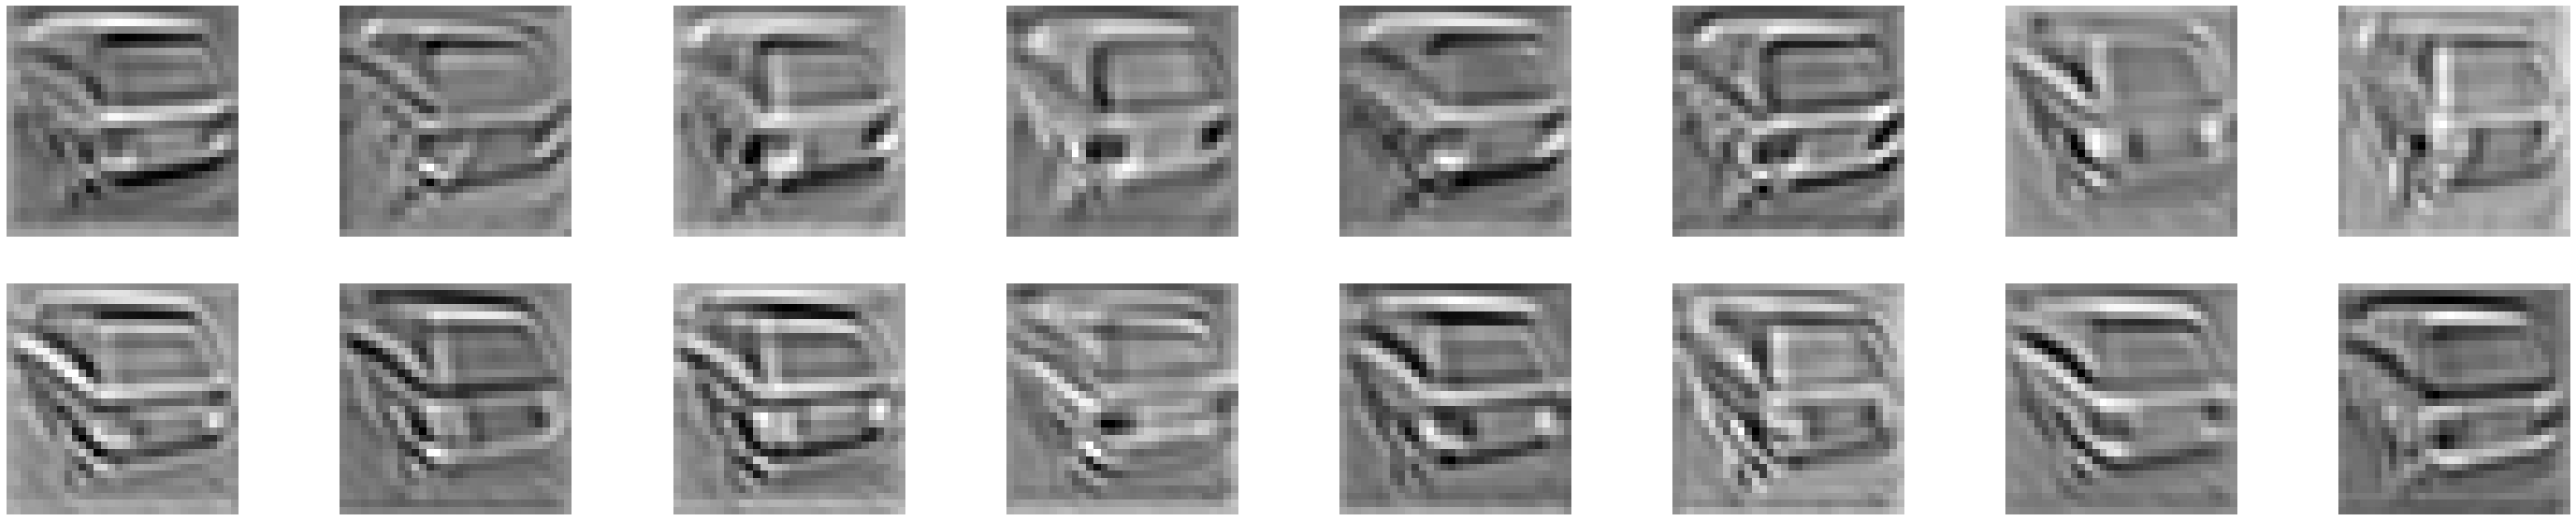

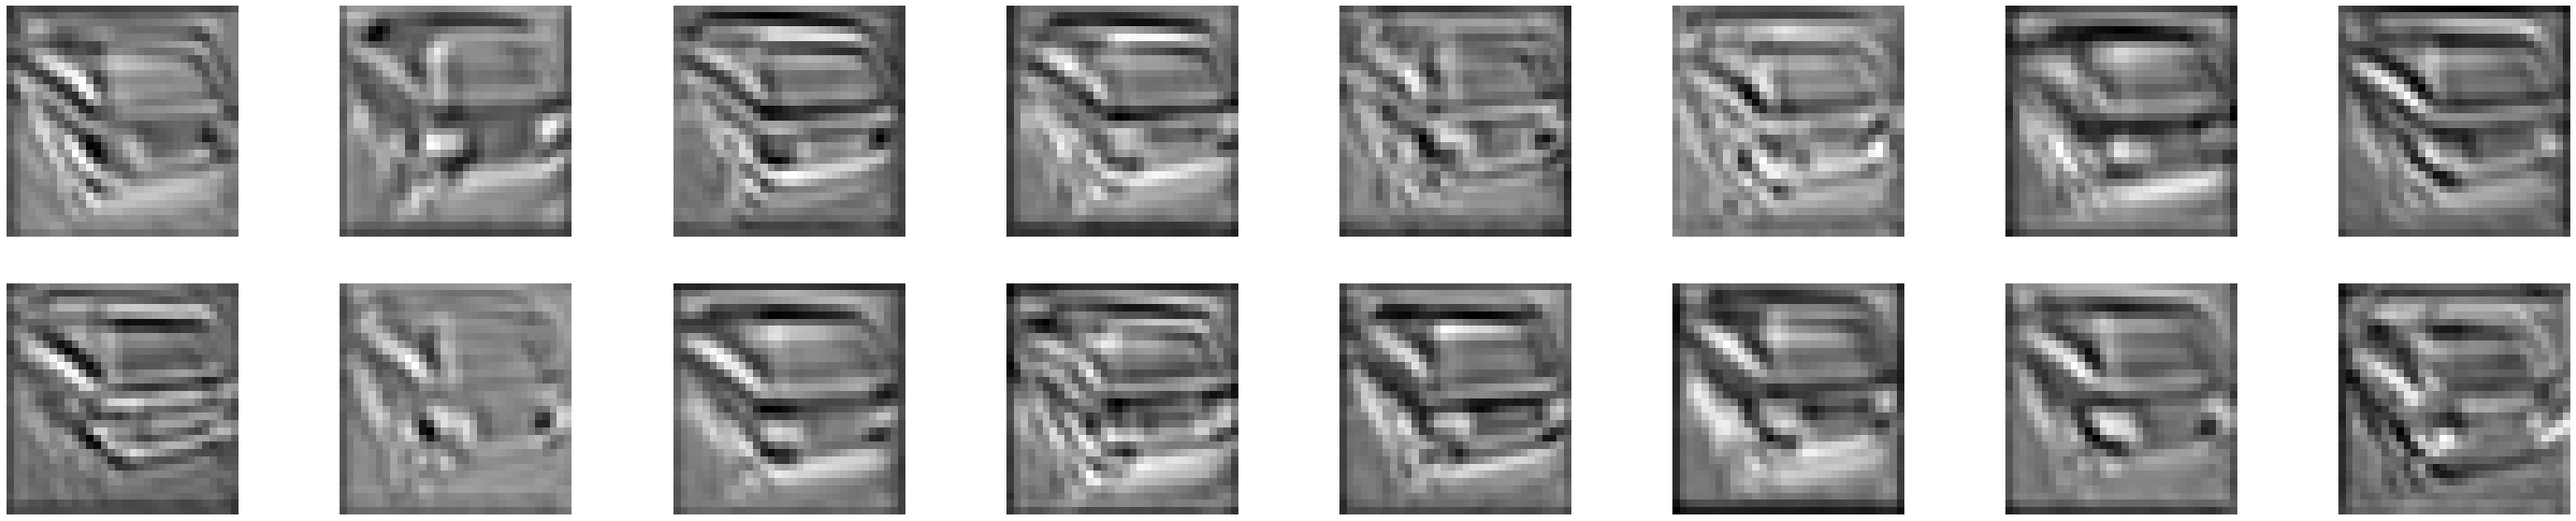

In [14]:
net = JulienNet(True)
net.load_state_dict(torch.load('Jnet.pth'))

net = Trainer.net


no_of_layers=0
conv_layers=[]
 
model_children=list(net.children())
 
for child in model_children:
  if type(child)==torch.nn.Conv2d:
    no_of_layers+=1
    conv_layers.append(child)
  elif type(child)==torch.nn.Sequential:
    for layer in child.children():
      if type(layer)==torch.nn.Conv2d:
        no_of_layers+=1
        conv_layers.append(layer)
print(no_of_layers)

img = Trainer.SetGenerator.training_set[random.randint(9,len(Trainer.SetGenerator.training_set))][0]

plt.imshow(Trainer.SetGenerator.imshow(torchvision.utils.make_grid(img)))

img= img.view(1,3,32,32)

results = [conv_layers[0](img)]
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1]))
outputs = results



for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print("Layer ",num_layer+1)
#     filters=[]
    for i, filter in enumerate(layer_viz):
#         filters.append(filter)
        if i == 16: 
            break
        plt.subplot(2, 8, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")

In [15]:
Trainer.predict(img)

'car'